## **Project Introduction: Customer Segmentation using Walmart E-Commerce Sales Dataset**

In today's highly competitive retail landscape, understanding customer behavior is essential for developing effective marketing strategies and improving customer satisfaction. This project aims to leverage the Walmart E-Commerce Sales Dataset to perform customer segmentation, which will enable Walmart to identify distinct customer groups based on their purchasing patterns and preferences. By employing advanced data mining techniques such as clustering, we will uncover valuable insights that can inform targeted marketing campaigns, enhance product recommendations, and optimize overall business operations.

### Key Points to Discuss:

1. **Data Collection and Preparation:**
   - Description of the Walmart E-Commerce Sales Dataset.
   - Steps for data cleaning and preprocessing.
   - Handling missing values and outliers.

2. **Exploratory Data Analysis (EDA):**
   - Visualizing key features and distributions.
   - Identifying trends and patterns in the data.
   - Insights gained from initial data exploration.

Here's the code.

In [2]:
# Install Package

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load Dataset

df = pd.read_csv("walmart.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
# Dataset Info

print(f"Number of column :{df.shape[1]}\nNumber of rows :{df.shape[0]}")
df.info()

Number of column :10
Number of rows :550068
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### **Data Cleaning**

In [8]:
# Missing Values

df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [9]:
# Duplicate

df.duplicated().sum()

0

**Conclusion**: There are no missing or duplicate data, indicating that the dataset is prepared for analysis.

### **Exploratory Data Analysis**

In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [13]:
df.describe(exclude=np.number)

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


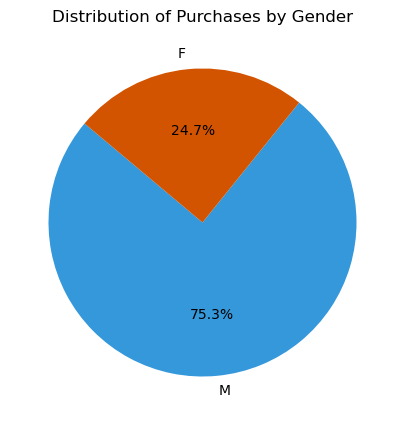

In [36]:
# 1. Distribution of Purchases Based on Gender

plt.figure(figsize=(8, 5))
colors = ['#3498db', '#d35400']
# Calculating the number of purchases based on gender
purchase_counts = df['Gender'].value_counts()
# Plot pie chart
plt.pie(purchase_counts, labels=purchase_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Purchases by Gender')
plt.show()

**Conclusion**: Male consumers dominate the number of purchases, accounting for 75.3% of the total. This signifies a significant disparity between the number of female and male consumers, warranting further analysis regarding which products attract more attention from male consumers compared to females.

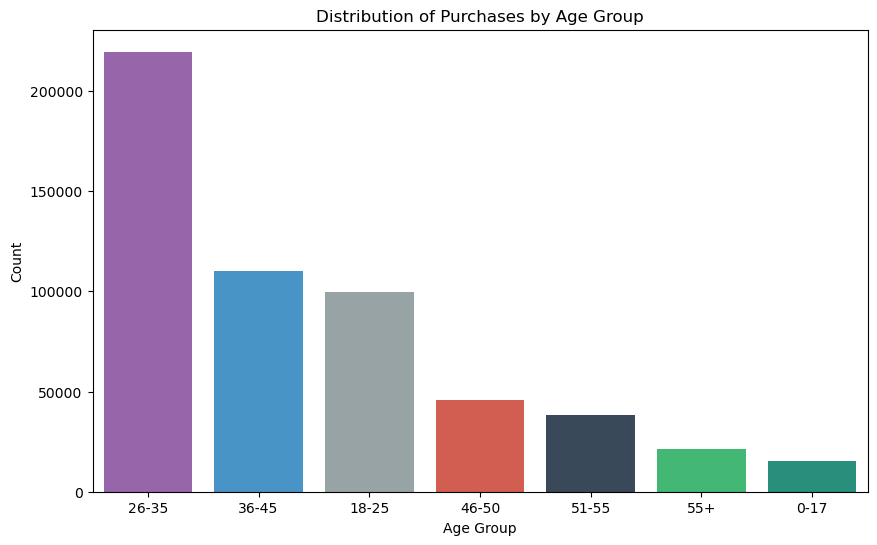

In [34]:
# 2. Distribution of Purchases Based on Age Group

plt.figure(figsize=(10, 6))
colors_palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#16a085"]
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index, palette = colors_palette)
plt.title('Distribution of Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Conclusion**: Consumers aged 26-35 constitute the largest purchase of Walmart's e-commerce platform. Additionally, the second and third positions are occupied by consumers aged 36-45 and 18-25, respectively. This indicates that the majority of Walmart's e-commerce buyers are productive age or young to middle-aged adults.

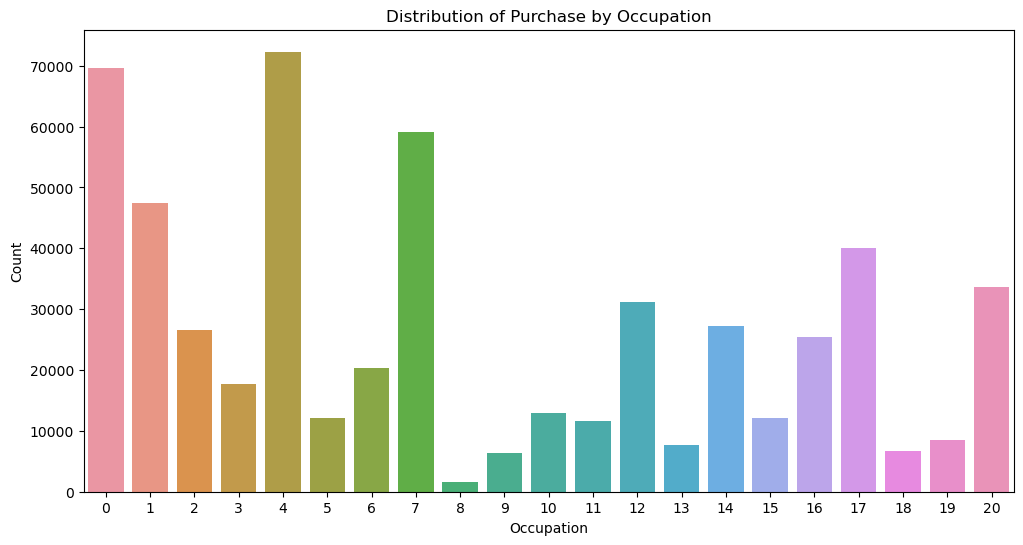

In [44]:
# 3. Distribution of Purchase Based on Occupation

plt.figure(figsize=(12,6))
sns.countplot(x='Occupation', data=df)
plt.title('Distribution of Purchase by Occupation')
plt.ylabel('Count')
plt.xlabel('Occupation')
plt.show()

**Conclusion**: The data reveals that the majority of consumer's purchase are in occupation number 4, while the fewest are in occupation number 8. To improve our services, further analysis is needed to explore the relationship between occupation and purchase amounts, considering factors such as workload, working hours, and product preferences.

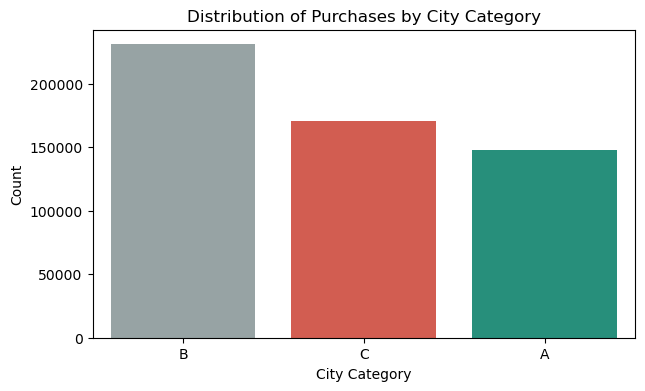

In [38]:
# 4. Distribution of Purchases Based on City Category

plt.figure(figsize=(7, 4))
colors_palette = ["#95a5a6", "#e74c3c", "#16a085"]
sns.countplot(x='City_Category', data=df, order=df['City_Category'].value_counts().index, palette = colors_palette)
plt.title('Distribution of Purchases by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

**Conclusion**: Among the three cities, City B has the highest number of purchases. To understand this better, we need to analyze factors such as distance, transportation options, and public transport accessibility, and how these impact consumer numbers in each city.

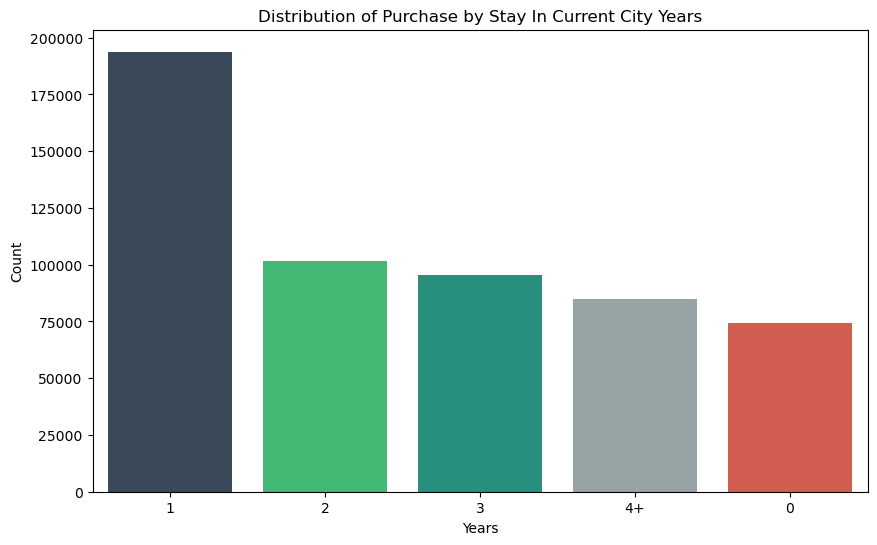

In [51]:
# 5. Distribution of Purchase Based on Stay In Current City Years

plt.figure(figsize=(10,6))
colors_palette = ["#34495e", "#2ecc71", "#16a085", "#95a5a6", "#e74c3c"]
sns.countplot(x='Stay_In_Current_City_Years', data=df, order=df['Stay_In_Current_City_Years'].value_counts().index, palette=colors_palette)
plt.title('Distribution of Purchase by Stay In Current City Years')
plt.ylabel('Count')
plt.xlabel('Years')
plt.show()

**Conclusion**: The shorter the consumers' stay in a city, the higher their purchase amounts, except for those who have lived in the city for less than a year. Further analysis and evaluation are needed to improve Walmart's promotional strategies for new residents.

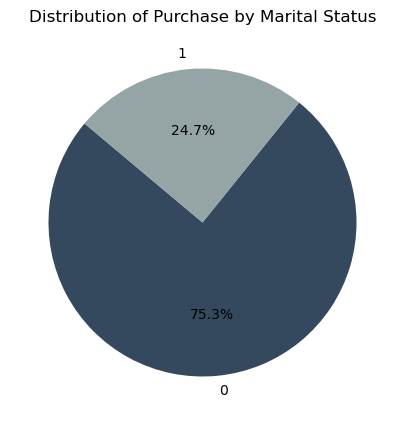

In [58]:
# 6. Distribution of Purchase Based on Marital Status

plt.figure(figsize=(8,5))
colors=["#34495e", "#95a5a6"]
plt.pie(purchase_counts, labels=df['Marital_Status'].value_counts().index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Purchase by Marital Status')
plt.show()

**Conclusion**: Single consumers contribute the highest purchase amounts at Walmart. This insight can be used to identify the most popular product categories among these consumers, allowing for better alignment with their preferences.

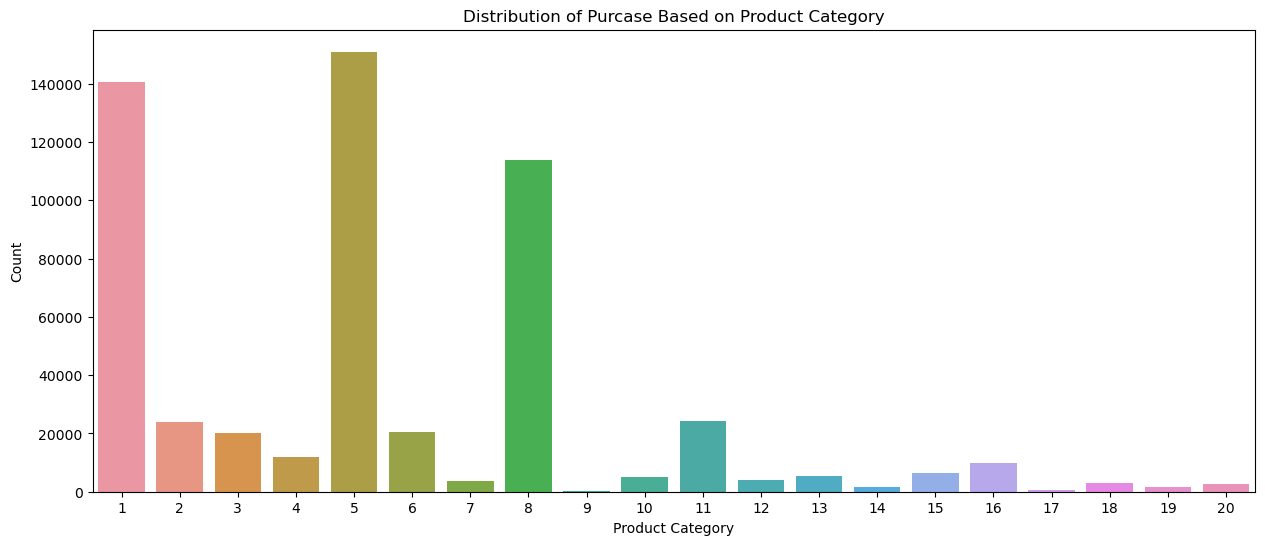

In [5]:
# 7. Distribution of Purchase Based on Product Category

plt.figure(figsize=(15,6))
sns.countplot(x='Product_Category', data=df)
plt.title('Distribution of Purcase Based on Product Category')
plt.ylabel('Count')
plt.xlabel('Product Category')
plt.show()

**Conclusion**: The most purchased product category is category 5, followed closely by categories 1 and 8. These three categories have similar purchase volumes, while there is a significant drop from category 3 to category 4. Therefore, categories 5, 1, and 8 are identified as high-demand products. Additionally, there is a need to evaluate promotional strategies for less purchased products.

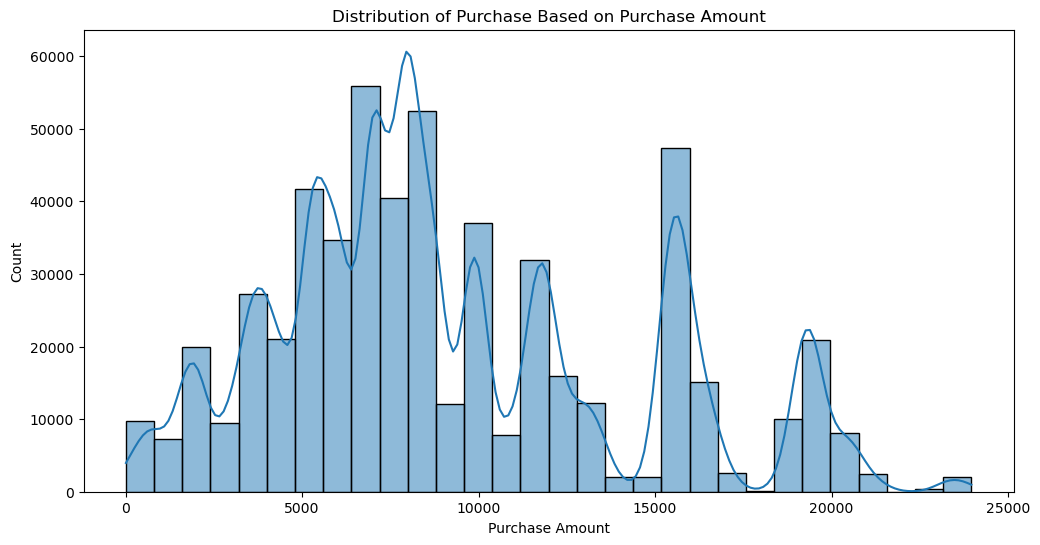

In [60]:
# 8. Distribution of Purchase Based on Purchase Amount

plt.figure(figsize=(12,6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase Based on Purchase Amount')
plt.ylabel('Count')
plt.xlabel('Purchase Amount')
plt.show()

**Conclusion**: The data distribution based on purchase amount shows a right skew, indicating that most purchases are for products priced between 0 - 15,000. However, there are outliers for products priced above 15,000. Further analysis is needed to understand the factors influencing these outliers.

### CONCLUSION

The results of this EDA can serve as a basis for further analysis, such as market segmentation, forecasting, and product recommendations. These advanced analyses should be tailored to the company's needs, enhancing both marketing strategies and customer service.